<a href="https://colab.research.google.com/github/Thien24112001/BaiTapAI_Tuan15_19146395/blob/main/fashion_mnist_CNN_VoHoangThien_19146395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import  pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, SGD,Adam
from keras.datasets import fashion_mnist
from random import randint

In [ ]:
(train_imgs,train_labels),(test_imgs,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

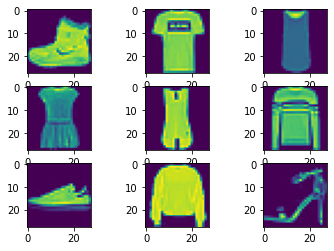

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3]


In [ ]:
for i in range(9):
  plt.subplot(331+i)
  plt.imshow(train_imgs[i])
plt.show()
print(train_labels[0:50])

In [ ]:
train_imgs[1].shape


(28, 28)

In [ ]:
# Reshape lại dữ liệu
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs/=255 #255 là giá trị lớn nhất của x train và x test
test_imgs/=255
train_labels = np_utils.to_categorical(train_labels,10)
test_labels = np_utils.to_categorical(test_labels,10)

In [ ]:
model = Sequential()
#Lock1
model.add(Conv2D(128,(2,2),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (28,28,1)))
model.add(Conv2D(128,(2,2),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#Lock2
model.add(Conv2D(64,(2,2),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (28,28,1)))
model.add(Conv2D(64,(2,2),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#lock3
model.add(Conv2D(32,(2,2),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (28,28,1)))
model.add(Conv2D(32,(2,2),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       65664     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
optimizer = RMSprop(learning_rate=0.0004)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_imgs,train_labels,epochs = 10,batch_size=64,validation_data=(test_imgs,test_labels),verbose=1)

Epoch 1/10
938/938 [==============================] - 34s 35ms/step - loss: 0.2955 - accuracy: 0.8922 - val_loss: 0.3112 - val_accuracy: 0.8875
Epoch 2/10
938/938 [==============================] - 32s 35ms/step - loss: 0.2638 - accuracy: 0.9036 - val_loss: 0.2957 - val_accuracy: 0.8953
Epoch 3/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2423 - accuracy: 0.9117 - val_loss: 0.2866 - val_accuracy: 0.8963
Epoch 4/10
938/938 [==============================] - 33s 35ms/step - loss: 0.2237 - accuracy: 0.9167 - val_loss: 0.2723 - val_accuracy: 0.8952
Epoch 5/10
938/938 [==============================] - 32s 34ms/step - loss: 0.2075 - accuracy: 0.9227 - val_loss: 0.2703 - val_accuracy: 0.9046
Epoch 6/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1936 - accuracy: 0.9279 - val_loss: 0.2575 - val_accuracy: 0.9065
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1837 - accuracy: 0.9308 - val_loss: 0.3292 - val_accuracy:

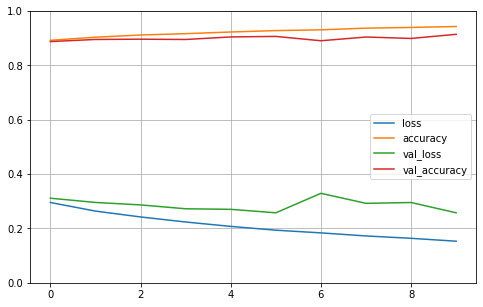

In [ ]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save('fashion_mnist_CNN.h5')